In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10 
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import LogisticRegression


# Define LeNet-5 model without dropout for color images
class SimpleLeNet5Color(nn.Module):
    def __init__(self):
        super(SimpleLeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6 * 14 * 14, 10)  # Adjust input size based on your image dimensions

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = x.view(-1, 6 * 14 * 14)  # Adjust the view size based on your image dimensions
        x = self.fc1(x)
        outputs['fc1'] = x
        return x, outputs

# Load the pre-trained model
n = 1
model = SimpleLeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model2_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model2_accuracies = dict()

for layer in layers:
    
    all_accuracies = []

    for n in range(10):
        # Load the pre-trained model
        model = SimpleLeNet5Color()
        model.load_state_dict(torch.load('model2_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)


        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score

        # Example data: let's pretend we have some simple x and y
        # x is a single feature and y is the target variable
        X = activations.reshape(activations.shape[0], -1)
        
        X_standardized = X.numpy()

        # Calculate the standard deviation of each column
        #std_devs = np.std(X, axis=0)

        # Identify columns with non-zero standard deviation
        #non_zero_std_mask = std_devs != 0

        # Select only columns with non-zero standard deviation
        #X_non_zero_std = X[:, non_zero_std_mask]

        # Standardize the remaining columns
        #X_standardized = (X_non_zero_std - np.mean(X_non_zero_std, axis=0)) / np.std(X_non_zero_std, axis=0)

        # Compute the covariance matrix
        covariance_matrix = np.cov(X_standardized, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Calculate the squared sum of the eigenvalues
        squared_sum = np.sum(eigenvalues ** 2)

        # Calculate participation ratio
        participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)

        # Calculate effective dimensionality
        effective_dimensionality = participation_ratio
        all_accuracies.append(effective_dimensionality)

    model2_accuracies[layer] = all_accuracies  #change
    

Files already downloaded and verified


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files alread

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x

        return x, outputs



# Load the pre-trained model
n = 1
model = LeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model3_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model3_accuracies = dict() #change

for layer in layers:
    
    all_accuracies = []

    for n in range(10):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model3_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)


        # Example data: let's pretend we have some simple x and y
        # x is a single feature and y is the target variable
        X = activations.reshape(activations.shape[0], -1)

        X_standardized = X.numpy()
        
        # Calculate the standard deviation of each column
        #std_devs = np.std(X, axis=0)

        # Identify columns with non-zero standard deviation
        #non_zero_std_mask = std_devs != 0

        # Select only columns with non-zero standard deviation
        #X_non_zero_std = X[:, non_zero_std_mask]

        # Standardize the remaining columns
        #X_standardized = (X_non_zero_std - np.mean(X_non_zero_std, axis=0)) / np.std(X_non_zero_std, axis=0)

        # Compute the covariance matrix
        covariance_matrix = np.cov(X_standardized, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Calculate the squared sum of the eigenvalues
        squared_sum = np.sum(eigenvalues ** 2)

        # Calculate participation ratio
        participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)

        # Calculate effective dimensionality
        effective_dimensionality = participation_ratio
        all_accuracies.append(effective_dimensionality)


    model3_accuracies[layer] = all_accuracies  #change
    

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files alread

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x

        #x = self.fc3(x)
        return x, outputs



# Load the pre-trained model
n = 1
model = LeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model4_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model4_accuracies = dict()

for layer in layers:

    all_accuracies = []

    for n in range(10):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model4_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)


        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score

    # Example data: let's pretend we have some simple x and y
        # x is a single feature and y is the target variable
        X = activations.reshape(activations.shape[0], -1)
        
        X_standardized = X.numpy()
        
        # Calculate the standard deviation of each column
        #std_devs = np.std(X, axis=0)

        # Identify columns with non-zero standard deviation
        #non_zero_std_mask = std_devs != 0

        # Select only columns with non-zero standard deviation
        #X_non_zero_std = X[:, non_zero_std_mask]

        # Standardize the remaining columns
        #X_standardized = (X_non_zero_std - np.mean(X_non_zero_std, axis=0)) / np.std(X_non_zero_std, axis=0)

        # Compute the covariance matrix
        covariance_matrix = np.cov(X_standardized, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Calculate the squared sum of the eigenvalues
        squared_sum = np.sum(eigenvalues ** 2)

        # Calculate participation ratio
        participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)

        # Calculate effective dimensionality
        effective_dimensionality = participation_ratio
        all_accuracies.append(effective_dimensionality)


    model4_accuracies[layer] = all_accuracies  #change
    

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files alread

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d


# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)        
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x
        x = torch.relu(x)
        outputs['relu4'] = x
        x = self.fc3(x)
        outputs['fc3'] = x
        return x, outputs



# Load the pre-trained model
n = 1
model = LeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model5_accuracies = dict()

for layer in layers:
    
    all_accuracies = []

    for n in range(10):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)


        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score

        # Example data: let's pretend we have some simple x and y
        # x is a single feature and y is the target variable
        X = activations.reshape(activations.shape[0], -1)
        
        X_standardized = X.numpy()

        # Calculate the standard deviation of each column
        #std_devs = np.std(X, axis=0)

        # Identify columns with non-zero standard deviation
        #non_zero_std_mask = std_devs != 0

        # Select only columns with non-zero standard deviation
        #X_non_zero_std = X[:, non_zero_std_mask]

        # Standardize the remaining columns
        #X_standardized = (X_non_zero_std - np.mean(X_non_zero_std, axis=0)) / np.std(X_non_zero_std, axis=0)

        # Compute the covariance matrix
        covariance_matrix = np.cov(X_standardized, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Calculate the squared sum of the eigenvalues
        squared_sum = np.sum(eigenvalues ** 2)

        # Calculate participation ratio
        participation_ratio = (np.sum(eigenvalues) ** 2) / (squared_sum)

        # Calculate effective dimensionality
        effective_dimensionality = participation_ratio
        all_accuracies.append(effective_dimensionality)


    model5_accuracies[layer] = all_accuracies  #change
    

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files alread

/var/folders/_4/_78_3bpd25194n_pbdcqxp7m0000gn/T/ipykernel_1825/4068329614.py:21: RuntimeWarning: Mean of empty slice
  average_accuracies = {layer: np.nanmean(accuracies) for layer, accuracies in normalized_accuracies.items()}
/var/folders/_4/_78_3bpd25194n_pbdcqxp7m0000gn/T/ipykernel_1825/4068329614.py:21: RuntimeWarning: Mean of empty slice
  average_accuracies = {layer: np.nanmean(accuracies) for layer, accuracies in normalized_accuracies.items()}
/var/folders/_4/_78_3bpd25194n_pbdcqxp7m0000gn/T/ipykernel_1825/4068329614.py:21: RuntimeWarning: Mean of empty slice
  average_accuracies = {layer: np.nanmean(accuracies) for layer, accuracies in normalized_accuracies.items()}


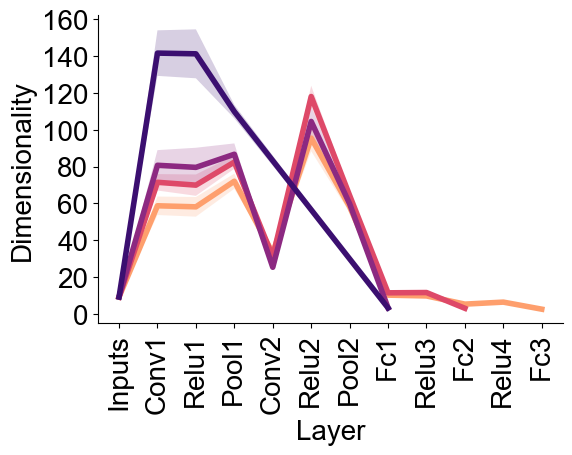

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import sem

import seaborn as sns
rainbow = sns.color_palette("magma", 4)

fig, ax = plt.subplots(figsize=(6, 4))


# Define the order of layers based on model5_accuracies
layer_order = list(model5_accuracies.keys())

# Function to plot data
def plot_model_accuracies(model_accuracies, color, label):
    # Normalize data to include all layers in the specified order
    normalized_accuracies = {layer: model_accuracies.get(layer, [np.nan] * 10) for layer in layer_order}

    # Calculating average accuracy and standard deviation for each layer
    average_accuracies = {layer: np.nanmean(accuracies) for layer, accuracies in normalized_accuracies.items()}
    std_accuracies = {layer: sem(accuracies, nan_policy='omit') for layer, accuracies in normalized_accuracies.items()}

    # Converting dictionary keys and values to lists for plotting
    layers = list(average_accuracies.keys())
    averages = list(average_accuracies.values())
    errors = list(std_accuracies.values())

    # Plotting only the layers present in the model
    present_indexes = [layer_order.index(layer) for layer in model_accuracies.keys() if layer in layer_order]
    present_layers = [layers[i].capitalize() for i in present_indexes]  # Capitalize layer names here
    present_averages = [averages[i] for i in present_indexes]
    present_errors = [errors[i] for i in present_indexes]

    plt.plot(present_layers, present_averages, label=f'Average Accuracy {label}', color=color, linewidth=4)
    plt.fill_between(
        present_layers,
        np.array(present_averages) - np.array(present_errors),
        np.array(present_averages) + np.array(present_errors),
        color=color,
        edgecolor='none',
        linewidth=0,
        alpha=0.2,
        label=f'Standard Deviation {label}'
    )
# Plotting each model
plot_model_accuracies(model5_accuracies, rainbow[3], 'Model 5')
plot_model_accuracies(model4_accuracies, rainbow[2], 'Model 4')
plot_model_accuracies(model3_accuracies, rainbow[1], 'Model 3')
plot_model_accuracies(model2_accuracies, rainbow[0], 'Model 2')

ax.set_xlabel('Layer', fontname="Arial", fontsize=20)
ax.set_ylabel('Dimensionality', fontname="Arial", fontsize=20)
ax.set_title('', fontname="Arial", fontsize=25, fontweight="bold")
plt.xticks(rotation=90)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the font name for axis tick labels to be Arial
for tick in ax.get_xticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("arial")
    tick.set_fontsize(20)

#plt.ylim(.4, .7)
plt.show()

In [ ]:
np.savez('model2_dims.npz', **model2_accuracies)
np.savez('model3_dims.npz', **model3_accuracies)
np.savez('model4_dims.npz', **model4_accuracies)
np.savez('model5_dims.npz', **model5_accuracies)
